In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
opt_train = pd.read_csv('optdigits.tra',header=None)

In [3]:
opt_train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
def regularize(reg_param, theta, l):
    weight = np.square(theta)
    weight = np.sum(theta)
    weight = reg_param*weight
    return weight/(2*l)

In [5]:
def hypothesis(theta, X):
    z = np.dot(X, theta)
    return 1/(1+np.exp(-(z)))

In [6]:
def cost(X, y, theta, reg_param):
    y1 = hypothesis(theta, X)
    return (-(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1)))+regularize(reg_param,theta, len(X))

In [7]:
X= pd.concat([pd.Series(1, index=opt_train.index, name='00'), opt_train.iloc[:,:64]], axis=1)

In [8]:
y = opt_train.iloc[:,64]

In [9]:
y.unique()

array([0, 7, 4, 6, 2, 5, 8, 1, 9, 3])

In [10]:
y1 = np.zeros([opt_train.shape[0], len(y.unique())])
y1 = pd.DataFrame(y1)

In [11]:
for i in range(0, len(y.unique())):
    for j in range(0, len(y1)):
        if y[j] == y.unique()[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def gradient_descent(X, y, theta, alpha, epochs,reg_param):
    m = len(X)
    X = X.to_numpy(dtype='float128')
    X = pd.DataFrame(X)
    for i in range(0, epochs):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            h = hypothesis(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= alpha*((reg_param/m)*theta.iloc[k, j]+((1/m)* np.sum((h-y.iloc[:, j])*X.iloc[:, k])))
            theta = pd.DataFrame(theta)
    return theta

In [13]:
theta = np.zeros([X.shape[1], y1.shape[1]], dtype='float128')
theta = gradient_descent(X, y1, theta, 0.02, 1500,reg_param=0)

In [14]:
theta.shape

(65, 10)

In [15]:
X.shape

(3823, 65)

In [16]:
output = []
cost_list=[]
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X)
    cst = cost(X,y1.iloc[:, i],theta1.iloc[:,i],1000)
    output.append(h)
    cost_list.append(cst)
output=pd.DataFrame(output)

In [17]:
output

,0,1,2,3,4,5,6,7,8,9,...,3813,3814,3815,3816,3817,3818,3819,3820,3821,3822
0,9.981260e-01,9.999806e-01,1.377451e-05,4.505145e-05,6.723350e-03,2.115684e-07,6.898062e-03,3.638415e-05,9.207820e-01,3.299973e-06,...,5.849777e-02,1.451508e-03,6.492690e-04,6.124424e-08,2.713454e-04,1.498357e-03,1.720116e-03,2.017532e-05,4.019716e-05,1.069073e-05
1,1.673337e-08,1.119878e-08,9.999711e-01,6.899149e-04,6.122760e-10,1.600238e-08,2.165079e-06,2.573991e-07,5.945288e-07,4.476068e-09,...,6.809565e-06,4.001796e-05,3.531693e-08,1.433530e-06,7.979054e-08,4.402268e-05,5.795561e-05,7.040247e-10,9.128620e-10,9.994626e-01
2,3.213102e-04,2.687530e-05,7.125554e-05,6.158316e-01,7.809198e-04,1.931927e-08,3.214884e-03,3.540560e-06,7.140220e-04,2.410085e-06,...,9.999908e-01,6.327893e-05,7.581368e-09,2.249818e-10,1.819236e-07,1.481537e-06,9.999992e-01,1.287703e-02,1.681981e-03,5.605450e-05
3,6.934992e-06,3.140385e-07,7.902075e-07,5.893169e-10,9.782612e-01,1.954279e-09,8.161733e-11,3.835394e-08,2.752700e-08,2.483692e-03,...,7.416391e-04,8.731985e-08,5.598312e-08,3.684233e-10,3.142784e-08,6.343460e-07,2.848675e-03,9.981210e-01,9.990680e-01,6.059665e-09
4,3.628958e-05,3.965010e-05,1.963663e-05,3.731046e-09,4.305279e-06,9.487749e-01,9.089187e-06,1.604741e-05,3.700224e-07,3.329916e-07,...,1.916244e-04,2.612816e-03,3.345635e-04,1.484810e-03,3.076548e-03,1.852297e-05,3.786378e-07,2.279200e-07,3.542094e-06,1.067221e-05
5,1.842246e-03,2.419272e-06,1.593591e-07,4.312067e-04,7.499513e-03,7.176322e-05,2.170228e-01,9.974916e-01,3.418383e-01,1.610849e-04,...,1.073688e-04,3.170832e-08,3.633191e-04,2.075467e-02,3.734743e-02,4.527397e-03,3.575677e-06,1.928608e-06,9.551456e-06,1.605595e-05
6,6.959038e-03,1.327727e-05,7.341806e-05,1.621693e-02,1.376173e-01,1.139846e-06,7.972449e-05,2.999858e-03,1.591799e-06,5.162653e-01,...,7.091034e-06,9.008714e-01,1.246862e-03,2.572672e-05,1.586570e-02,2.034733e-02,1.752713e-05,2.946010e-02,1.489463e-04,3.994631e-05
7,1.547542e-09,8.700794e-12,9.143237e-06,1.221817e-02,2.228327e-05,9.900338e-04,1.406057e-02,4.943783e-02,3.136069e-09,4.846384e-04,...,1.996501e-05,2.363171e-01,2.520767e-07,1.907052e-04,1.627454e-03,2.988861e-07,4.867044e-04,1.163997e-04,7.335546e-08,2.448676e-05
8,2.462986e-03,1.259379e-04,8.549420e-07,7.822174e-01,8.689298e-06,6.280992e-03,9.850656e-01,5.119323e-01,2.827891e-05,4.319405e-05,...,8.335070e-09,7.902549e-02,6.066173e-01,1.308574e-03,9.984257e-01,9.931460e-01,5.289742e-11,3.233784e-10,1.331872e-10,7.015634e-02
9,2.788731e-06,5.928111e-07,1.958036e-06,3.668561e-08,1.138260e-05,6.518622e-07,3.487674e-07,1.676240e-04,1.386219e-07,5.508097e-05,...,1.086058e-09,1.573775e-09,7.878827e-05,9.952235e-01,1.227796e-02,6.929253e-03,1.553757e-11,1.699644e-06,8.269479e-08,4.337403e-02


In [18]:
cost_list

[-0.18444846543551614488,
 -0.15393194794184609061,
 -0.017005337640781931058,
 -0.25138619189278247587,
 -0.18126527331198250944,
 -0.21706547947050649515,
 -0.15367943138082081277,
 -0.24869449490462524255,
 -0.20286721331763337985,
 -0.22585569330692583874]

In [19]:
accuracy = 0
for col in range(0, 10):
    for row in range(len(y1)):
        if y1.iloc[row, col] == 1 and output.iloc[col, row] >= 0.5:
            accuracy += 1
accuracy = accuracy/len(X)

In [20]:
print(accuracy)

0.9463771906879415


In [21]:
theta

,0,1,2,3,4,5,6,7,8,9
0,-0.015583,-0.008378,0.000817,-0.012007,-0.014572,-0.012954,-0.089163,-0.077381,-0.056023,-0.020597
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.007084,0.021930,-0.019358,-0.013000,0.004610,-0.025598,-0.007818,-0.075505,-0.020541,0.035421
3,-0.097721,0.051267,-0.070656,-0.194791,-0.008912,0.132657,-0.184748,-0.054970,-0.055979,-0.044681
4,-0.078153,-0.043673,-0.218472,-0.131987,0.003404,-0.022120,-0.008718,0.003622,0.160546,-0.076634
...,...,...,...,...,...,...,...,...,...,...
60,-0.024115,-0.205060,-0.328758,-0.045976,0.049999,0.081688,0.034515,-0.078596,-0.088785,0.031917
61,-0.042100,-0.308337,-0.155572,0.022324,0.010510,-0.106744,-0.092186,-0.086033,0.031872,0.064010
62,-0.129726,-0.165201,-0.130922,0.153898,0.135564,-0.062048,-0.197569,0.124724,-0.102153,-0.051975
63,-0.094612,-0.056333,-0.064097,-0.010683,0.200621,-0.057641,-0.079531,-0.086958,-0.079408,-0.203481


In [22]:
accuracy

0.9463771906879415

In [23]:
df_test = pd.read_csv('optdigits.tes',header=None)
df_test_feat = df_test.iloc[:,:64]
df_test_out = df_test.iloc[:,64]
X_test= pd.concat([pd.Series(1, index=df_test_feat.index, name='00'), df_test_feat], axis=1)
y_test = np.zeros([df_test_out.shape[0], len(df_test_out.unique())])
y_test = pd.DataFrame(y_test)            

In [25]:
for i in range(0, len(df_test_out.unique())):
    for j in range(0, len(y_test)):
        if df_test_out[j] == df_test_out.unique()[i]:
            y_test.iloc[j, i] = 1
        else: 
            y_test.iloc[j, i] = 0
y_test

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
X_test.shape

(1797, 65)

In [27]:
y_test.shape

(1797, 10)

In [28]:
output_test = []
cost_test =[]
for i in range(0, 10):
    theta1 = pd.DataFrame(theta)
    h = hypothesis(theta1.iloc[:,i], X_test)
    cst = cost(X_test,y_test.iloc[:, i],theta1.iloc[:,i],1000)
    output_test.append(h)
    cost_test.append(cst)
output_test=pd.DataFrame(output_test)

In [29]:
output_test

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,9.997701e-01,1.002683e-09,1.233091e-04,1.749928e-08,1.351458e-03,9.800355e-06,2.143175e-05,3.147000e-07,9.958834e-06,2.951295e-03,...,9.820215e-06,5.167114e-04,7.733599e-07,5.367910e-08,1.050354e-04,1.521434e-03,9.968536e-01,3.699350e-06,8.184835e-03,7.643557e-07
1,7.438701e-07,2.239326e-06,5.982660e-05,7.611863e-07,2.652037e-05,9.498268e-10,1.430745e-10,9.989324e-01,1.630013e-07,1.732004e-06,...,7.690674e-10,1.221537e-05,6.242121e-08,6.220817e-06,5.833005e-05,1.055939e-07,3.701855e-09,2.551595e-09,7.817600e-08,2.854083e-10
2,1.065603e-05,2.419528e-04,9.331006e-06,1.657910e-09,9.999828e-01,2.588677e-08,1.232959e-02,3.636784e-03,4.207814e-08,6.840480e-08,...,2.251335e-04,9.999892e-01,1.061540e-04,2.717052e-05,9.999593e-01,3.400847e-07,9.053364e-07,1.298251e-03,1.399176e-06,7.754554e-05
3,7.630347e-07,2.883921e-05,6.760279e-04,4.643232e-06,1.519460e-02,2.265599e-09,9.724366e-01,4.988939e-07,1.338944e-05,2.413658e-08,...,9.580362e-06,1.417065e-03,1.842508e-06,8.559885e-07,1.103235e-03,6.352613e-09,1.434459e-06,5.180991e-04,1.016471e-07,8.474610e-05
4,4.333160e-05,8.591297e-06,6.274121e-01,2.914010e-04,6.740872e-08,2.105185e-07,7.591812e-06,2.090111e-05,5.518287e-05,2.725480e-07,...,2.692236e-07,7.707958e-10,6.300550e-04,3.152611e-03,2.049073e-09,7.196195e-07,4.896342e-06,1.846035e-05,7.518588e-07,1.771769e-05
5,3.821209e-04,4.729660e-06,3.452562e-09,1.849472e-02,4.562414e-09,4.779696e-03,1.443688e-04,3.775844e-04,1.001671e-08,3.935677e-02,...,9.354277e-01,2.868995e-08,6.500950e-09,7.718664e-10,1.692691e-08,1.727726e-03,2.367032e-05,7.845508e-11,6.554078e-05,1.214545e-08
6,1.077419e-03,4.892663e-03,1.840511e-01,9.725727e-04,9.081401e-04,6.975582e-05,5.869883e-02,2.298134e-05,9.990358e-01,3.499355e-03,...,2.511710e-04,6.093908e-06,2.648202e-01,1.444302e-02,3.374282e-05,1.479588e-02,6.888905e-06,9.896179e-01,1.338368e-02,7.638338e-01
7,2.249209e-09,9.998402e-01,3.064736e-01,3.634603e-03,6.056335e-03,1.526992e-01,3.895714e-02,8.645024e-04,9.491355e-05,9.283921e-03,...,2.070248e-04,1.415293e-03,2.551495e-01,8.186063e-01,1.407300e-04,9.886238e-06,2.182260e-09,5.489696e-02,1.319697e-04,2.990484e-04
8,1.552749e-02,1.101143e-05,5.527912e-08,2.780507e-03,4.678231e-10,2.154302e-01,1.178688e-08,3.236946e-04,8.123116e-05,9.930550e-01,...,1.074068e-02,1.132170e-11,1.037844e-07,4.542857e-07,2.362289e-10,9.824120e-01,1.111585e-06,8.013956e-07,9.964832e-01,2.713433e-05
9,1.847843e-05,4.409352e-05,6.197532e-09,9.967311e-01,1.904020e-07,1.808366e-01,1.845446e-07,2.282809e-06,1.465149e-04,7.750828e-04,...,8.209451e-04,1.714893e-11,8.455562e-05,8.999817e-03,4.659919e-12,3.251945e-03,4.762820e-09,2.149598e-06,5.268358e-04,6.418974e-05


In [30]:
accuracy_test = 0
for col in range(0, 10):
    for row in range(len(y_test)):
        if y_test.iloc[row, col] == 1 and output_test.iloc[col, row] >= 0.5:
            accuracy_test += 1
accuracy_test = accuracy_test/len(X_test)

In [31]:
accuracy_test

0.1930996104618809

In [32]:
cost_test

[-0.39397958026825984158,
 1.5041035625607723884,
 2.5637204020988662218,
 1.7144637658869789705,
 1.9791559524870428329,
 -0.45535968216834381088,
 0.40686630829636235963,
 0.8204814112951753659,
 0.53589381444873202,
 0.60087643295477983964]

Text(0.5, 1.0, 'Test and Training Errors Combined')

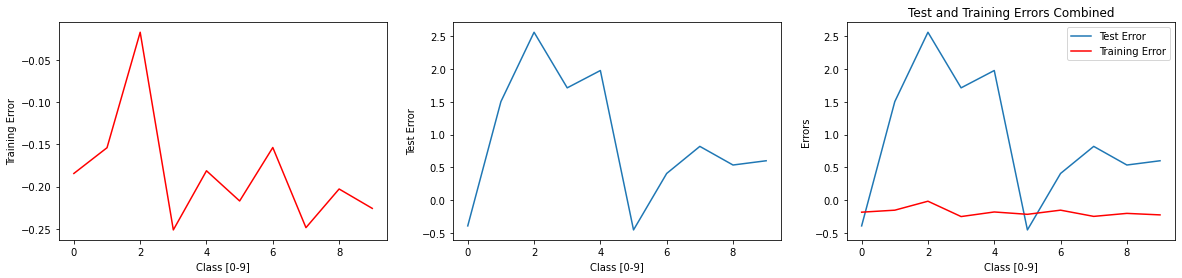

In [33]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(range(0,10),cost_list,'r')
plt.xlabel('Class [0-9]')
plt.ylabel('Training Error')
plt.subplot(1,3,2)
plt.plot(range(0,10),cost_test)
plt.xlabel('Class [0-9]')
plt.ylabel('Test Error')
plt.subplot(1,3,3)
plt.plot(range(0,10),cost_test)
plt.plot(range(0,10),cost_list,'r')
plt.xlabel('Class [0-9]')
plt.legend(["Test Error", "Training Error"], loc ="upper right")
plt.ylabel('Errors')
plt.title('Test and Training Errors Combined')

In [34]:
reg_ind=[10,100,200,500,1000]
theta_list=[]
for j in range(len(reg_ind)):
    theta = np.zeros([X.shape[1], y1.shape[1]], dtype='float128')
    theta = gradient_descent(X, y1, theta, 0.02, 1500,reg_param=reg_ind[j])
    theta_list.append(theta)

In [36]:
cost_list_tr=[]
for j in range(len(reg_ind)):
    ct =0
    theta1 = pd.DataFrame(theta_list[j])
    for i in range(0, 10):
        cst = cost(X,y1.iloc[:, i],theta1.iloc[:,i],reg_ind[j])
        ct+=cst
    ct=ct/10
    cost_list_tr.append(ct)

In [37]:
cost_list_test=[]
for j in range(len(reg_ind)):
    ct =0
    theta1 = pd.DataFrame(theta_list[j])
    for i in range(0, 10):
        cst = cost(X_test,y_test.iloc[:, i],theta1.iloc[:,i],reg_ind[j])
        ct+=cst
    ct=ct/10
    cost_list_test.append(ct)

Text(0.5, 1.0, 'Test and Training Errors Combined')

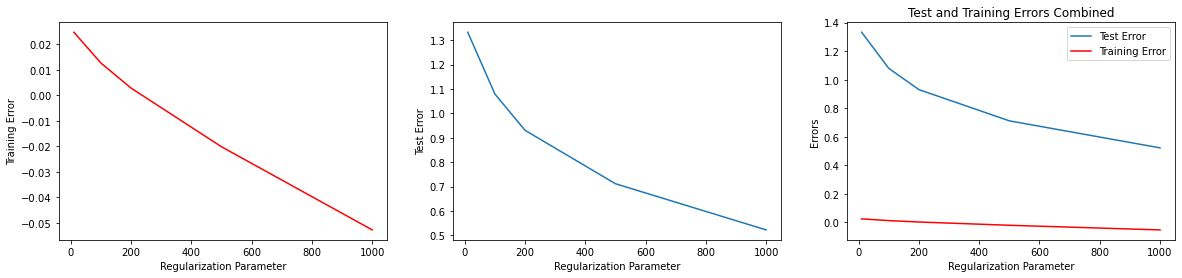

In [38]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
plt.plot(reg_ind,cost_list_tr,'r')
plt.xlabel('Regularization Parameter')
plt.ylabel('Training Error')
plt.subplot(1,3,2)
plt.plot(reg_ind,cost_list_test)
plt.xlabel('Regularization Parameter')
plt.ylabel('Test Error')
plt.subplot(1,3,3)
plt.plot(reg_ind,cost_list_test)
plt.plot(reg_ind,cost_list_tr,'r')
plt.xlabel('Regularization Parameter')
plt.legend(["Test Error", "Training Error"], loc ="upper right")
plt.ylabel('Errors')
plt.title('Test and Training Errors Combined')